# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Load the dataset


In [21]:
df = pd.read_csv('train.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# Basic Information about the Dataset


In [22]:
print("DATASET SHAPE AND INFO")
print(f"Shape: {df.shape}")
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")

print("\n" + "=" * 80)
print("COLUMN INFORMATION")
df.info()

DATASET SHAPE AND INFO
Shape: (891, 12)
Total Rows: 891
Total Columns: 12

COLUMN INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Statistical Summary


In [23]:
print("STATISTICAL SUMMARY (DESCRIPTIVE STATISTICS)")
print(df.describe())

STATISTICAL SUMMARY (DESCRIPTIVE STATISTICS)
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [24]:
# Missing Values Analysis
print("MISSING VALUES ANALYSIS")
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum().values / len(df) * 100).round(2)
})
print(missing_data)
print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")
print(f"Percentage of Missing Data: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100).round(2)}%")

MISSING VALUES ANALYSIS
         Column  Missing_Count  Missing_Percentage
0   PassengerId              0                0.00
1      Survived              0                0.00
2        Pclass              0                0.00
3          Name              0                0.00
4           Sex              0                0.00
5           Age            177               19.87
6         SibSp              0                0.00
7         Parch              0                0.00
8        Ticket              0                0.00
9          Fare              0                0.00
10        Cabin            687               77.10
11     Embarked              2                0.22

Total Missing Values: 866
Percentage of Missing Data: 8.1%


In [25]:

print("DATA TYPES ANALYSIS")
print("=" * 80)
dtype_stats = pd.DataFrame({
    'Data_Type': df.dtypes.values,
    'Column_Name': df.columns
})
print(dtype_stats)
print(f"\nUnique Data Types: {df.dtypes.nunique()}")
print(f"\nData Type Distribution:\n{df.dtypes.value_counts()}")

DATA TYPES ANALYSIS
   Data_Type  Column_Name
0      int64  PassengerId
1      int64     Survived
2      int64       Pclass
3     object         Name
4     object          Sex
5    float64          Age
6      int64        SibSp
7      int64        Parch
8     object       Ticket
9    float64         Fare
10    object        Cabin
11    object     Embarked

Unique Data Types: 3

Data Type Distribution:
int64      5
object     5
float64    2
Name: count, dtype: int64


In [26]:

print("DUPLICATE RECORDS ANALYSIS")
print("=" * 80)
print(f"Total Duplicate Rows (all columns): {df.duplicated().sum()}")
print(f"Percentage of Duplicates: {(df.duplicated().sum() / len(df) * 100).round(2)}%")

# Check duplicates for each column
print("\nDuplicate Count by Column:")
for col in df.columns:
    dup_count = df[col].duplicated().sum()
    print(f"{col}: {dup_count} duplicates")

DUPLICATE RECORDS ANALYSIS
Total Duplicate Rows (all columns): 0
Percentage of Duplicates: 0.0%

Duplicate Count by Column:
PassengerId: 0 duplicates
Survived: 889 duplicates
Pclass: 888 duplicates
Name: 0 duplicates
Sex: 889 duplicates
Age: 802 duplicates
SibSp: 884 duplicates
Parch: 884 duplicates
Ticket: 210 duplicates
Fare: 643 duplicates
Cabin: 743 duplicates
Embarked: 887 duplicates


In [27]:

print("NUMERICAL COLUMNS DETAILED ANALYSIS")
print("=" * 80)
numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    print(f"\n{col}:")
    print(f"  Min: {df[col].min()}")
    print(f"  Max: {df[col].max()}")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Std Dev: {df[col].std():.2f}")
    print(f"  Skewness: {df[col].skew():.2f}")
    print(f"  Kurtosis: {df[col].kurtosis():.2f}")

NUMERICAL COLUMNS DETAILED ANALYSIS

PassengerId:
  Min: 1
  Max: 891
  Mean: 446.00
  Median: 446.00
  Std Dev: 257.35
  Skewness: 0.00
  Kurtosis: -1.20

Survived:
  Min: 0
  Max: 1
  Mean: 0.38
  Median: 0.00
  Std Dev: 0.49
  Skewness: 0.48
  Kurtosis: -1.78

Pclass:
  Min: 1
  Max: 3
  Mean: 2.31
  Median: 3.00
  Std Dev: 0.84
  Skewness: -0.63
  Kurtosis: -1.28

Age:
  Min: 0.42
  Max: 80.0
  Mean: 29.70
  Median: 28.00
  Std Dev: 14.53
  Skewness: 0.39
  Kurtosis: 0.18

SibSp:
  Min: 0
  Max: 8
  Mean: 0.52
  Median: 0.00
  Std Dev: 1.10
  Skewness: 3.70
  Kurtosis: 17.88

Parch:
  Min: 0
  Max: 6
  Mean: 0.38
  Median: 0.00
  Std Dev: 0.81
  Skewness: 2.75
  Kurtosis: 9.78

Fare:
  Min: 0.0
  Max: 512.3292
  Mean: 32.20
  Median: 14.45
  Std Dev: 49.69
  Skewness: 4.79
  Kurtosis: 33.40


In [28]:

print("CATEGORICAL COLUMNS ANALYSIS")
print("=" * 80)
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique Values: {df[col].nunique()}")
    print(f"  Data Type: {df[col].dtype}")
    print(f"  Top 5 Values:\n{df[col].value_counts().head()}")

CATEGORICAL COLUMNS ANALYSIS

Name:
  Unique Values: 891
  Data Type: object
  Top 5 Values:
Name
Braund, Mr. Owen Harris             1
Boulos, Mr. Hanna                   1
Frolicher-Stehli, Mr. Maxmillian    1
Gilinski, Mr. Eliezer               1
Murdlin, Mr. Joseph                 1
Name: count, dtype: int64

Sex:
  Unique Values: 2
  Data Type: object
  Top 5 Values:
Sex
male      577
female    314
Name: count, dtype: int64

Ticket:
  Unique Values: 681
  Data Type: object
  Top 5 Values:
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
Name: count, dtype: int64

Cabin:
  Unique Values: 147
  Data Type: object
  Top 5 Values:
Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
Name: count, dtype: int64

Embarked:
  Unique Values: 3
  Data Type: object
  Top 5 Values:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [30]:

print("CORRELATION ANALYSIS")
print("=" * 80)

if len(numerical_cols) > 1:
    correlation_matrix = df[numerical_cols].corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)
    
    # Pairwise correlation with target (if 'y' or 'target' column exists)
    target_cols = [col for col in df.columns if col.lower() in ['y', 'target', 'label', 'price']]
    if target_cols:
        target_col = target_cols[0]
        print(f"\n\nCorrelation with {target_col}:")
        correlations = df[numerical_cols].corr()[target_col].sort_values(ascending=False)
        print(correlations)

CORRELATION ANALYSIS

Correlation Matrix:
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [32]:

print("OUTLIERS DETECTION (IQR METHOD)")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\n{col}:")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"  Number of Outliers: {len(outliers)} ({(len(outliers)/len(df)*100):.2f}%)")

OUTLIERS DETECTION (IQR METHOD)

PassengerId:
  Q1: 223.50, Q3: 668.50, IQR: 445.00
  Lower Bound: -444.00, Upper Bound: 1336.00
  Number of Outliers: 0 (0.00%)

Survived:
  Q1: 0.00, Q3: 1.00, IQR: 1.00
  Lower Bound: -1.50, Upper Bound: 2.50
  Number of Outliers: 0 (0.00%)

Pclass:
  Q1: 2.00, Q3: 3.00, IQR: 1.00
  Lower Bound: 0.50, Upper Bound: 4.50
  Number of Outliers: 0 (0.00%)

Age:
  Q1: 20.12, Q3: 38.00, IQR: 17.88
  Lower Bound: -6.69, Upper Bound: 64.81
  Number of Outliers: 11 (1.23%)

SibSp:
  Q1: 0.00, Q3: 1.00, IQR: 1.00
  Lower Bound: -1.50, Upper Bound: 2.50
  Number of Outliers: 46 (5.16%)

Parch:
  Q1: 0.00, Q3: 0.00, IQR: 0.00
  Lower Bound: 0.00, Upper Bound: 0.00
  Number of Outliers: 213 (23.91%)

Fare:
  Q1: 7.91, Q3: 31.00, IQR: 23.09
  Lower Bound: -26.72, Upper Bound: 65.63
  Number of Outliers: 116 (13.02%)


VISUALIZATIONS


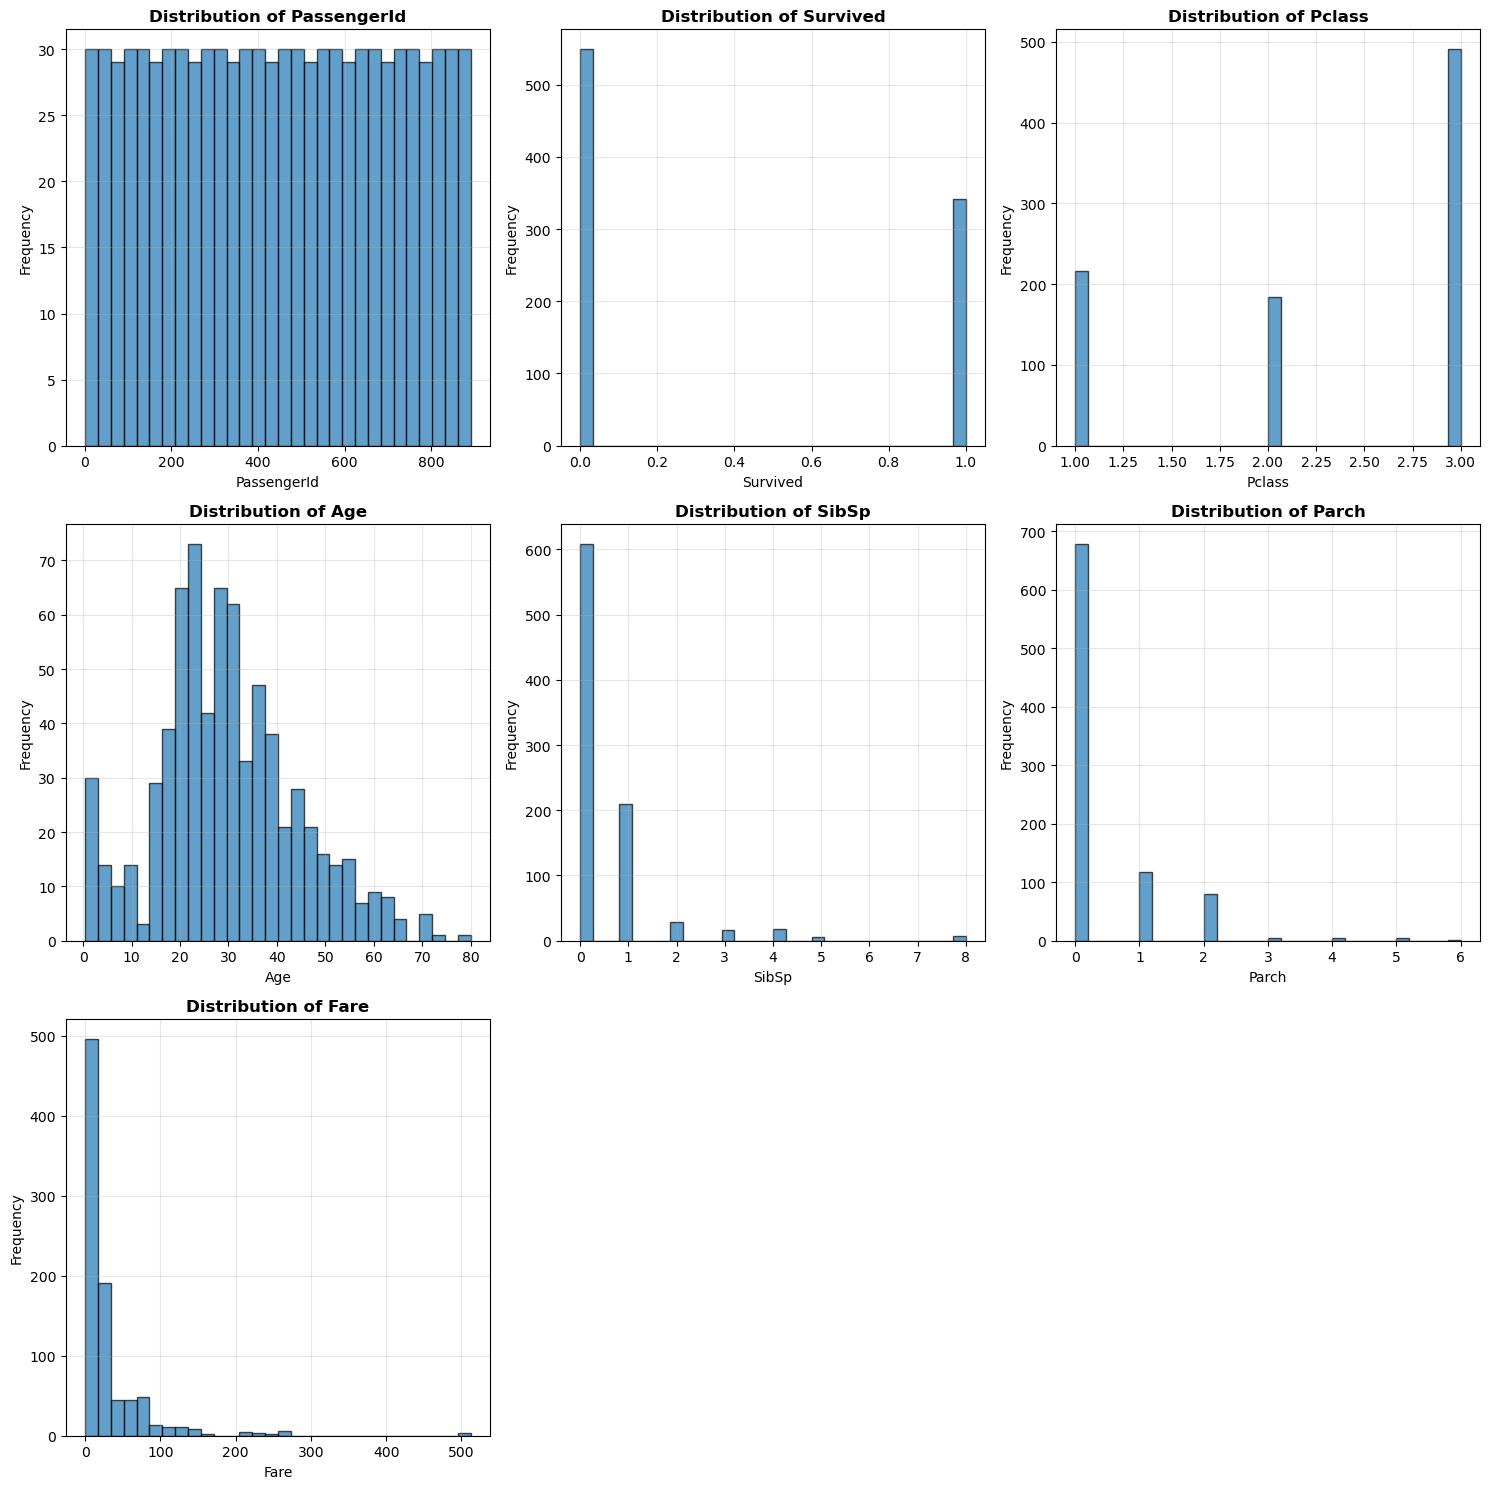

Distribution histograms displayed.


In [34]:
# Visualization 1: Distribution of Numerical Columns
print("VISUALIZATIONS")

if len(numerical_cols) > 0:
    fig, axes = plt.subplots(figsize=(15, 5 * ((len(numerical_cols) + 2) // 3)), 
                              nrows=((len(numerical_cols) + 2) // 3), ncols=3)
    axes = axes.flatten()
    
    for idx, col in enumerate(numerical_cols):
        axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(alpha=0.3)
    
    # Hide extra subplots
    for idx in range(len(numerical_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    print("Distribution histograms displayed.")

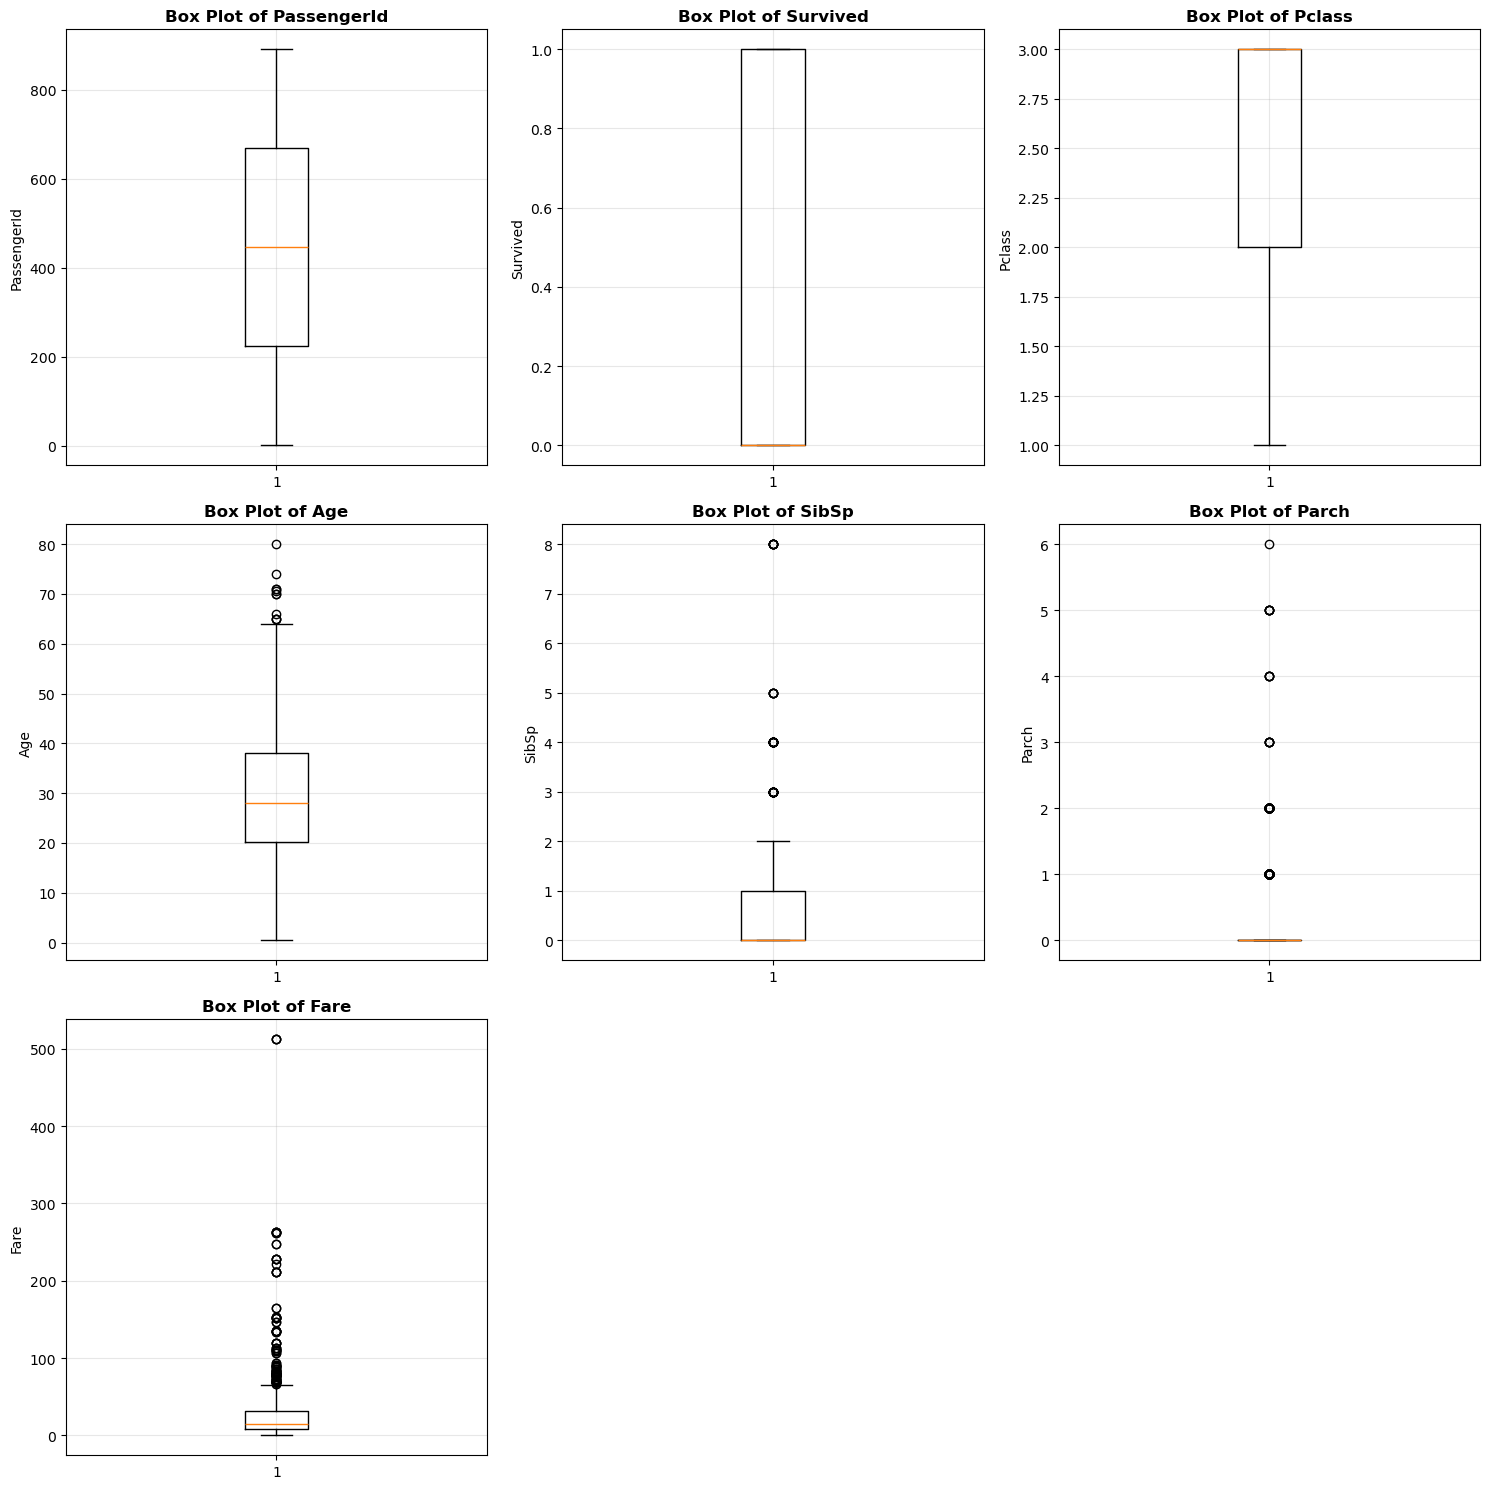

Box plots displayed.


In [13]:
# Visualization 2: Box Plots for Outlier Detection
if len(numerical_cols) > 0:
    fig, axes = plt.subplots(figsize=(15, 5 * ((len(numerical_cols) + 2) // 3)), 
                              nrows=((len(numerical_cols) + 2) // 3), ncols=3)
    axes = axes.flatten()
    
    for idx, col in enumerate(numerical_cols):
        axes[idx].boxplot(df[col].dropna())
        axes[idx].set_title(f'Box Plot of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_ylabel(col)
        axes[idx].grid(alpha=0.3)
    
    # Hide extra subplots
    for idx in range(len(numerical_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    print("Box plots displayed.")

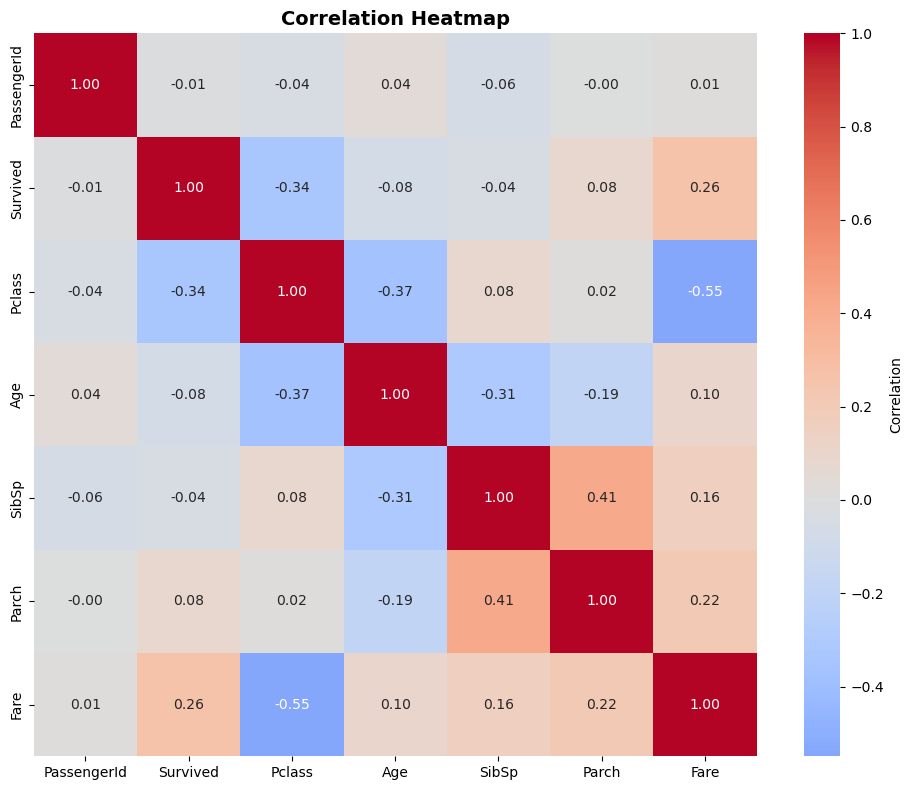

Correlation heatmap displayed.


In [14]:
# Visualization 3: Correlation Heatmap
if len(numerical_cols) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                fmt='.2f', square=True, cbar_kws={'label': 'Correlation'})
    plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    print("Correlation heatmap displayed.")

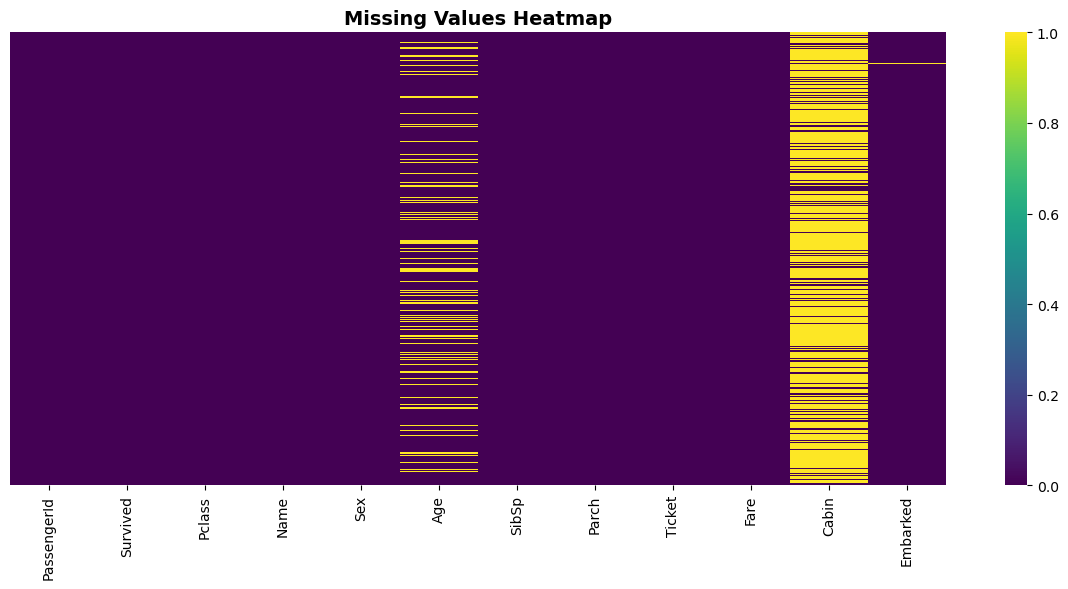

Missing values heatmap displayed.


In [15]:
# Visualization 4: Missing Values Heatmap
if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Heatmap', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    print("Missing values heatmap displayed.")

In [35]:

print("COMPREHENSIVE DATA PROFILING SUMMARY")
summary_info = {
    "Total Rows": df.shape[0],
    "Total Columns": df.shape[1],
    "Memory Usage (MB)": df.memory_usage(deep=True).sum() / 1024**2,
    "Numerical Columns": len(numerical_cols),
    "Categorical Columns": len(categorical_cols),
    "Total Missing Values": df.isnull().sum().sum(),
    "Total Duplicates": df.duplicated().sum(),
    "Missing Data %": f"{(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%"
}

for key, value in summary_info.items():
    if isinstance(value, float):
        print(f"{key}: {value:.2f}")
    else:
        print(f"{key}: {value}")

COMPREHENSIVE DATA PROFILING SUMMARY
Total Rows: 891
Total Columns: 12
Memory Usage (MB): 0.28
Numerical Columns: 7
Categorical Columns: 5
Total Missing Values: 866
Total Duplicates: 0
Missing Data %: 8.10%


In [38]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [42]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:00<00:00, 27.51it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]